In [1]:
from barplots import barplots
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
from sanitize_ml_labels import sanitize_ml_labels
from IPython.display import HTML

In [2]:
models = ["mlp", "cnn", "fixed_mlp", "fixed_cnn"]
reports = []
for model in models:
    df = pd.read_csv(f"{model}.csv")
    model = model.replace("mlp", "ffnn")
    if not model.startswith("fixed"):
        model = f"bayesian_{model}"
    df["model"] = model
    reports.append(df)
df = pd.concat(reports)
df = df[df.run_type=="test"]

In [3]:
for metric in ["AUROC", "AUPRC"]:
    display(HTML(f"<h3>{metric}</h3>"))
    for task in df.task.unique():
        display(HTML(f"<h4>{sanitize_ml_labels(task)}</h4>"))
        for model_1 in df.model.unique():
            left = df[(df.model==model_1) & (df.task == task)][metric].values
            for model_2 in df.model.unique():
                if model_1 >= model_2:
                    continue
                right = df[(df.model==model_2) & (df.task == task)][metric].values
                fmodel_1, fmodel_2 = sanitize_ml_labels((model_1, model_2))
                holdouts_number = min(len(left), len(right))
                left = left[:holdouts_number]
                right = right[:holdouts_number]
                _, p_value = wilcoxon(left, right)
                if p_value < 0.01:
                    if np.mean(left) > np.mean(right):
                        display(HTML(f"<span>{fmodel_1} wins against {fmodel_2}, P-value: {p_value}</span>"))
                    else:
                        display(HTML(f"<span>{fmodel_2} wins against {fmodel_1}, P-value: {p_value}</span>"))
                else:
                    display(HTML(f"<span>{fmodel_2} is indistinguishable from {fmodel_1}, P-value: {p_value}</span>"))
                

In [4]:
custom_defaults = {
    "AE vs IE": "active_enhancers_vs_inactive_enhancers",
    "IE vs IP": "inactive_enhancers_vs_inactive_promoters",
    "AP vs IP": "active_promoters_vs_inactive_promoters",
    "AE vs AP": "active_enhancers_vs_active_promoters",
    "A vs I": "active_vs_inactive",
}

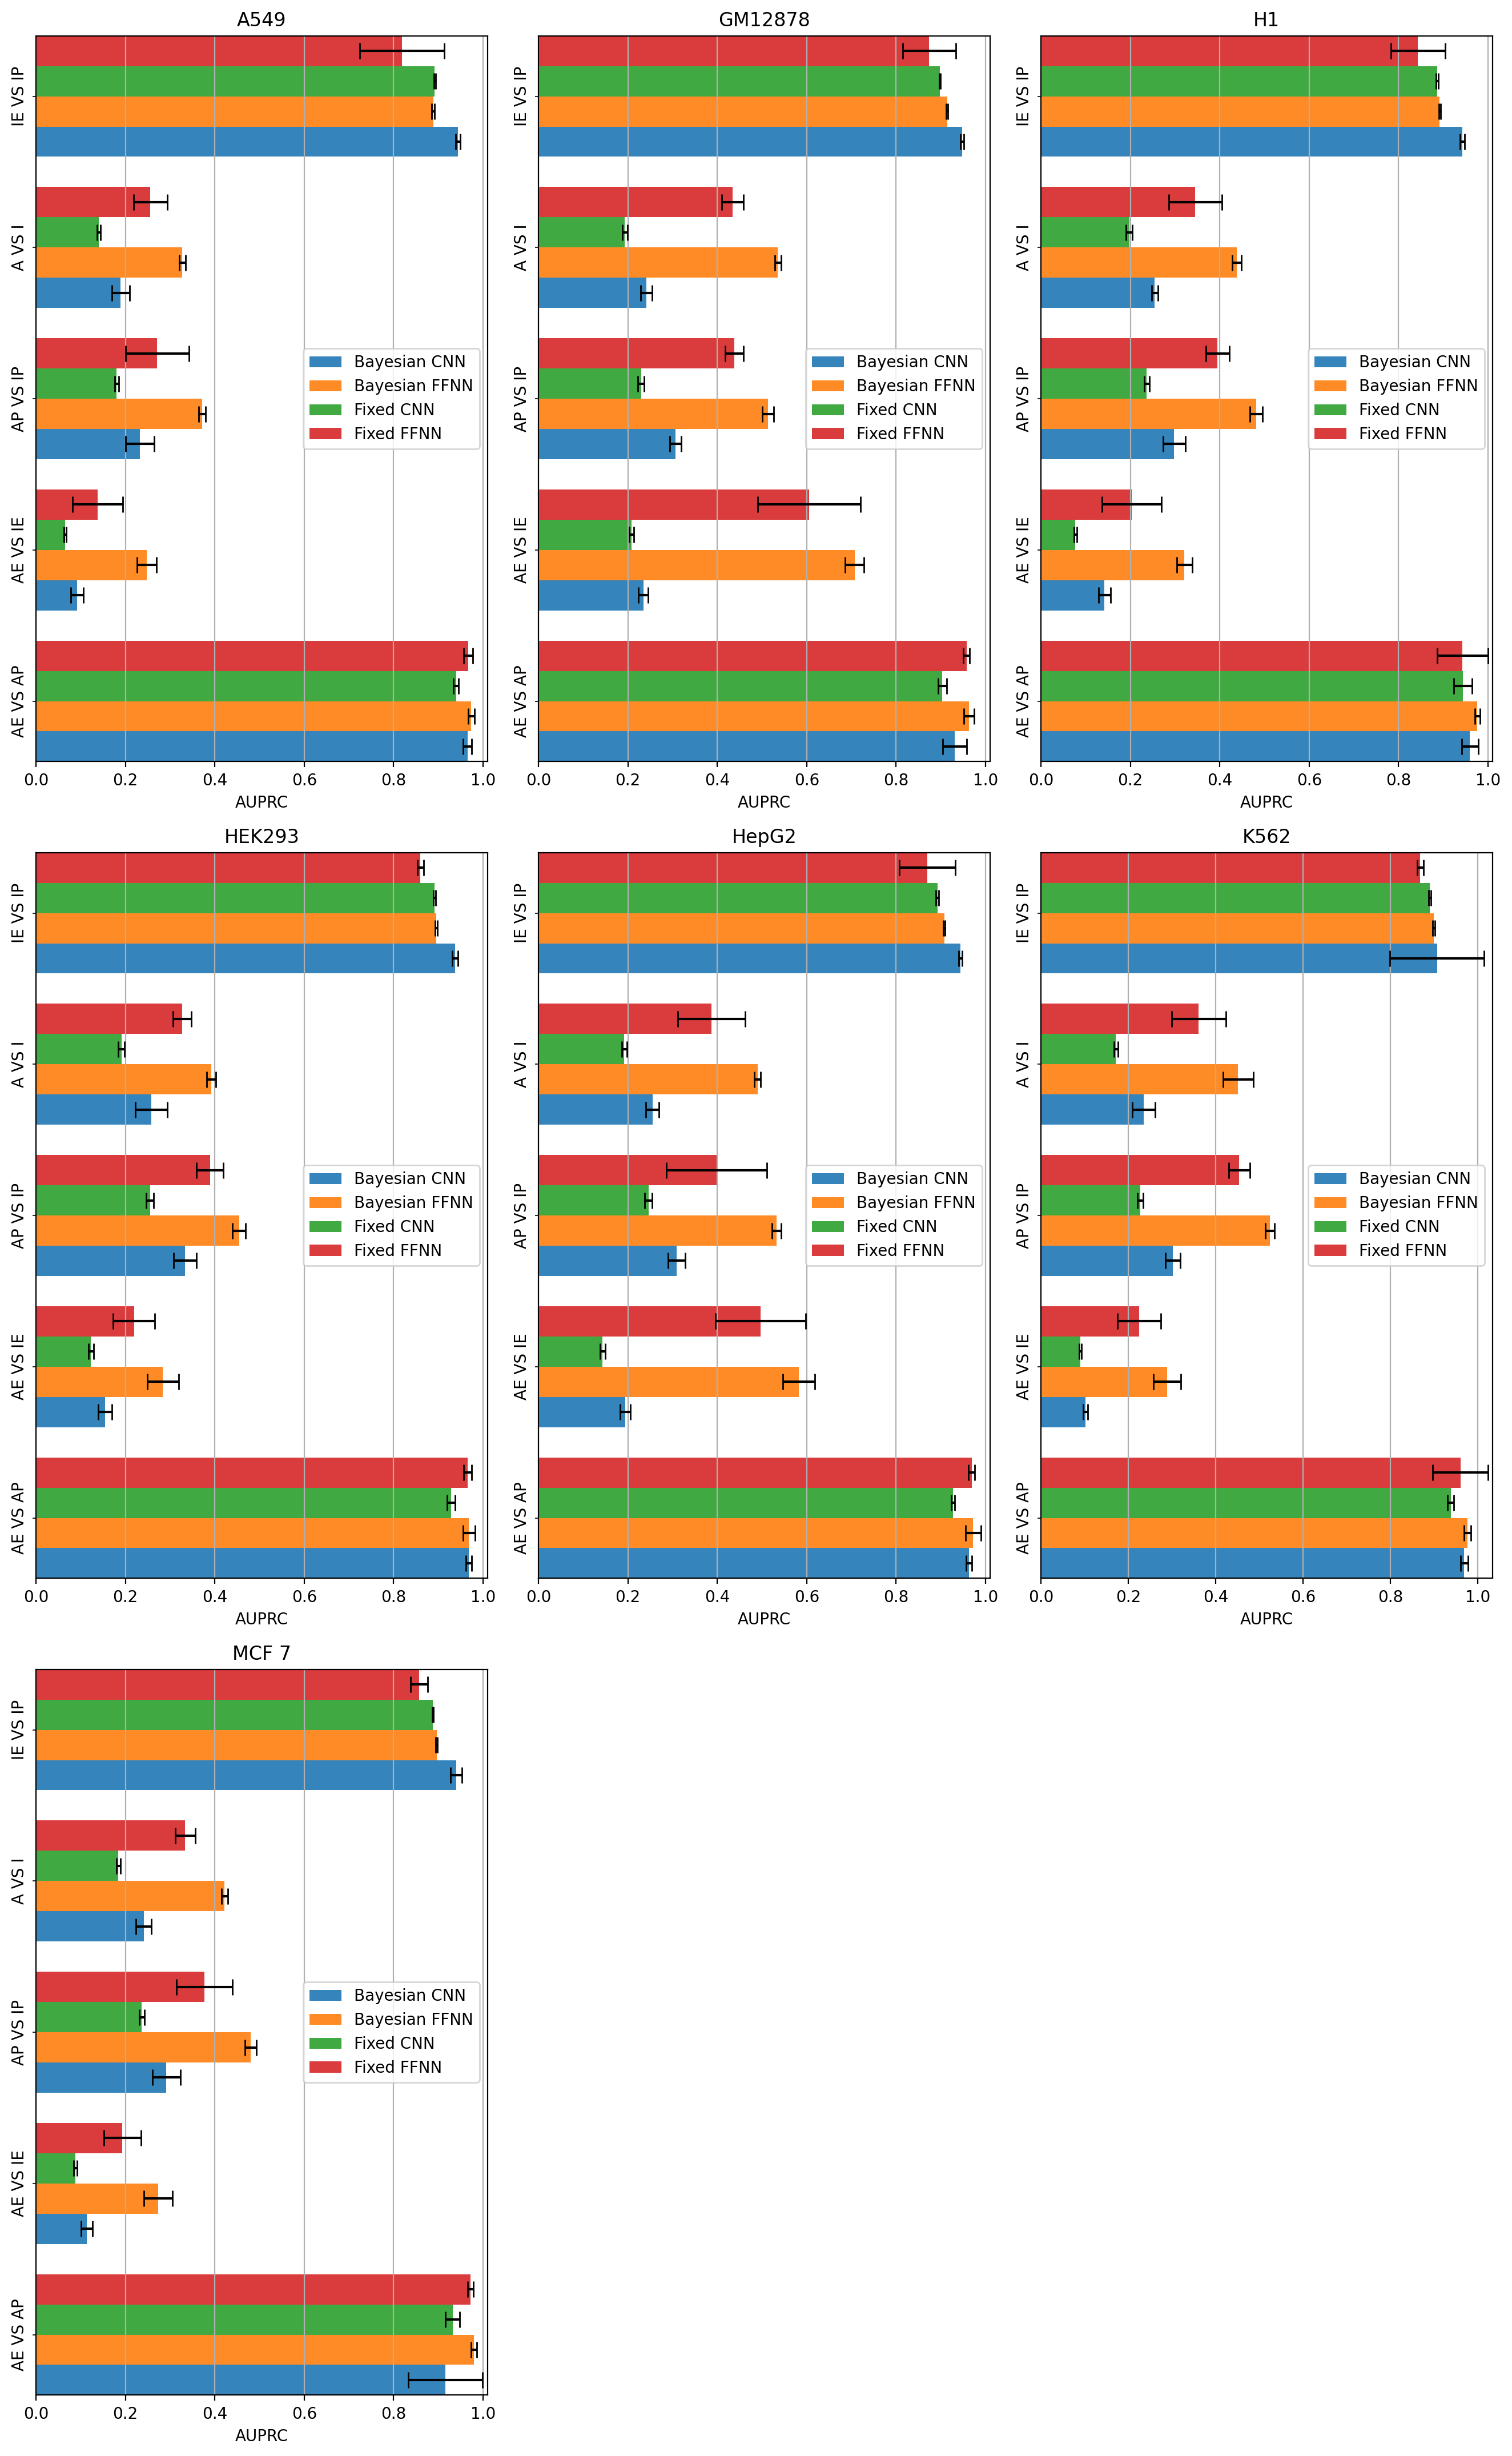

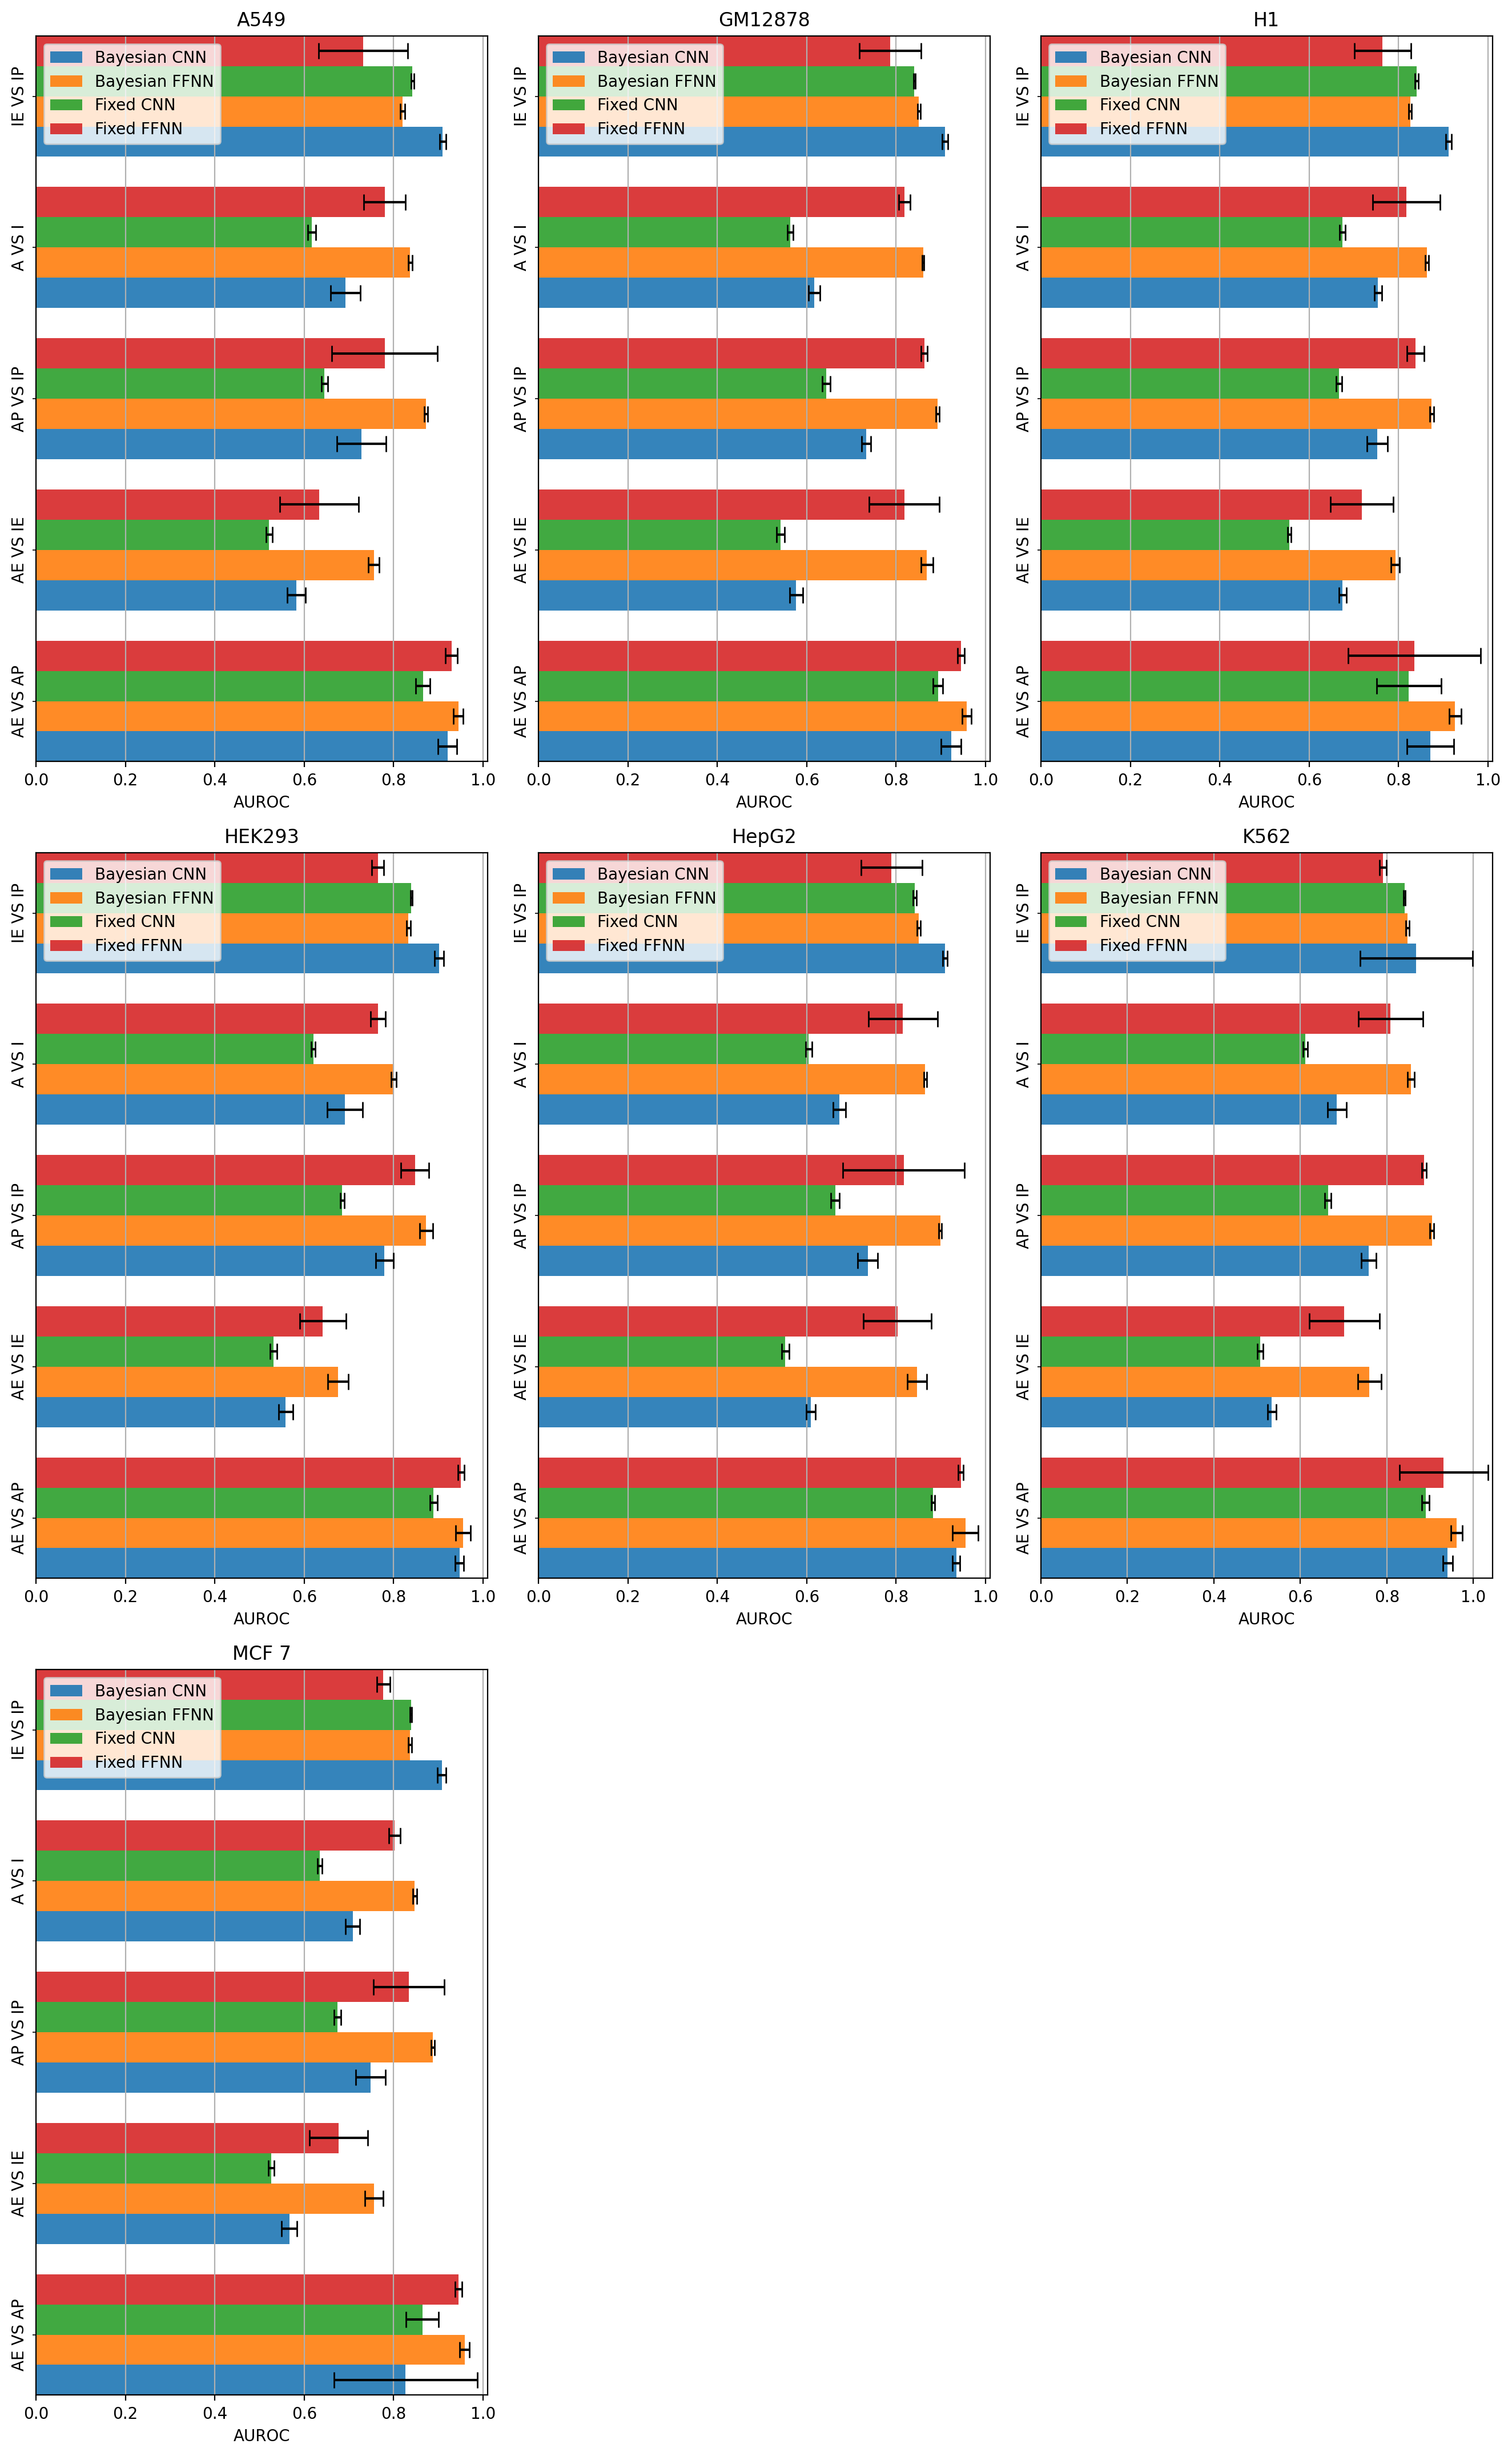

In [10]:
index = ["cell_line", "task", "model"]
fig, axes = barplots(
    df.drop(columns=["holdout_number"])[index+["AUROC", "AUPRC"]],
    groupby=index,
    custom_defaults=custom_defaults,
    subplots=True,
    #path=f'barplots_{meta_model}/{{feature}}.png',
    plots_per_row=3,
    show_legend=True,
    orientation="horizontal",
    unique_minor_labels=False,
    minor_rotation=90
)

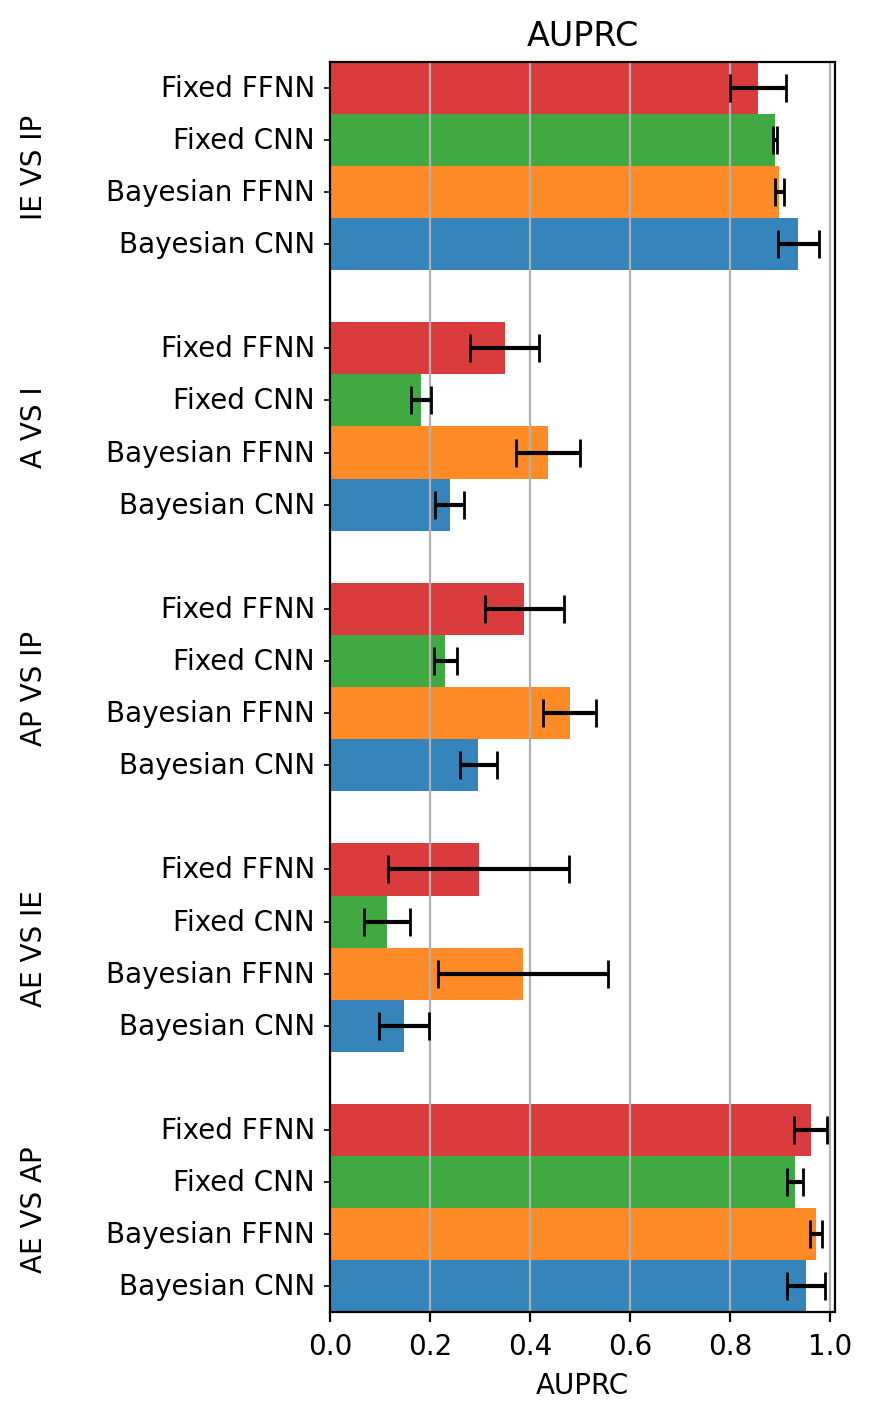

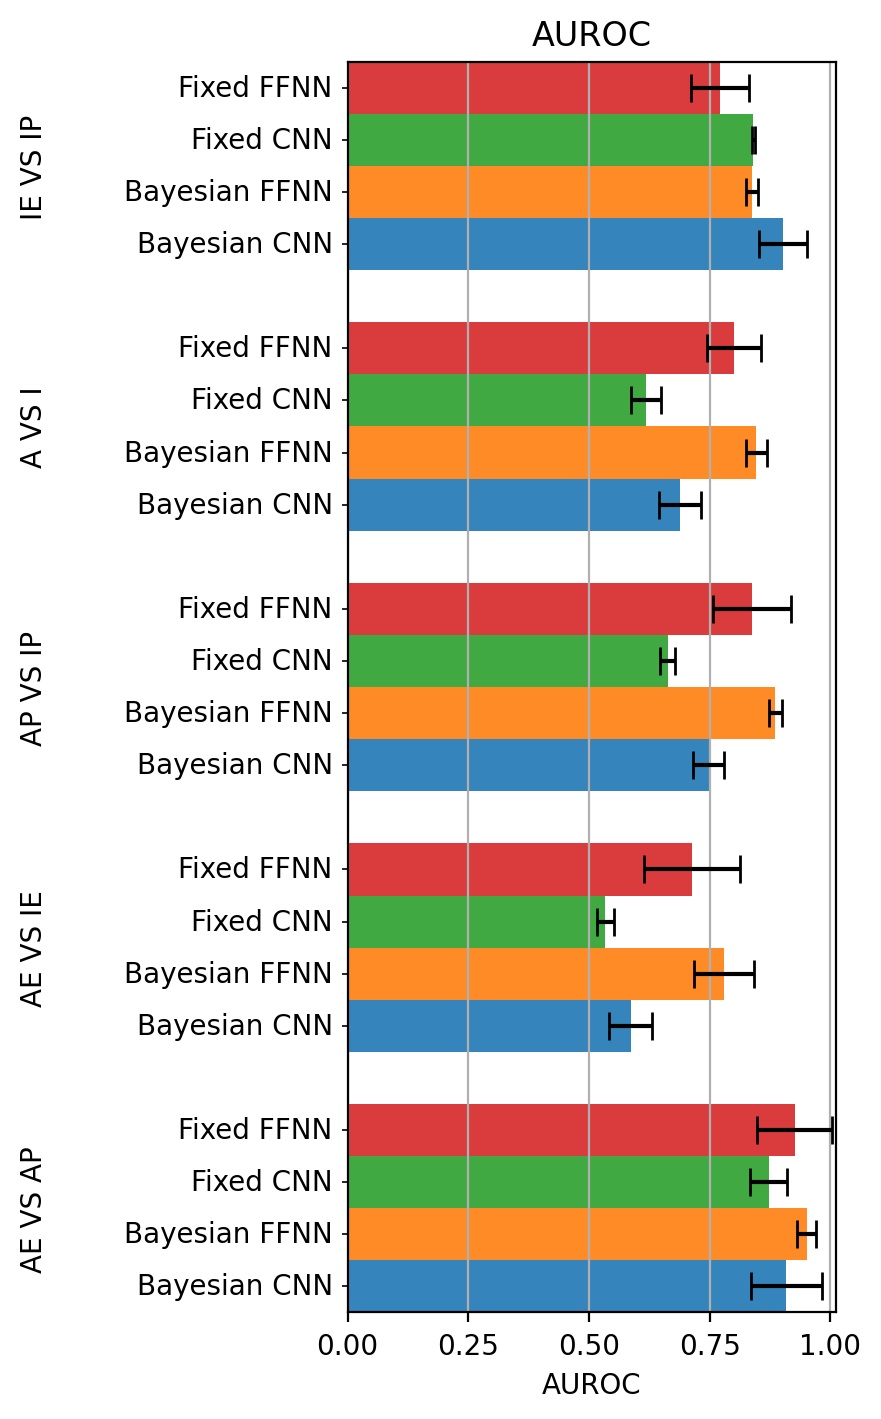

In [6]:
index = ["task", "model"]
fig, axes = barplots(
    df.drop(columns=["holdout_number"])[index+["AUROC", "AUPRC"]],
    groupby=index,
    custom_defaults=custom_defaults,
    #path=f'barplots_{meta_model}/{{feature}}.png',
    show_legend=False,
    orientation="horizontal",
    unique_minor_labels=False,
    major_rotation=90
)

In [7]:
df.cell_line.unique()

array(['A549', 'GM12878', 'H1', 'HEK293', 'HepG2', 'K562', 'MCF-7'],
      dtype=object)

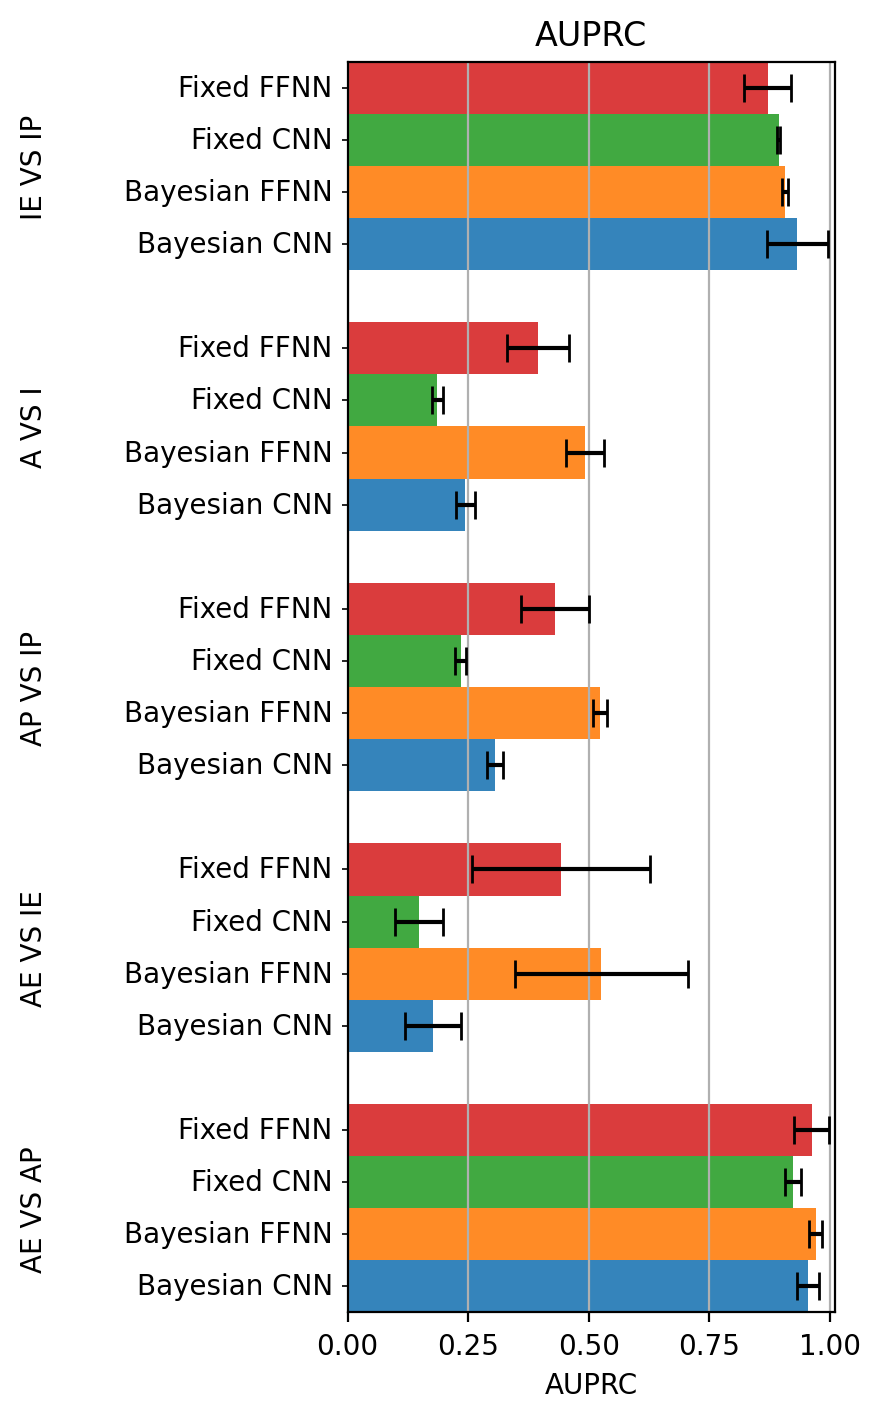

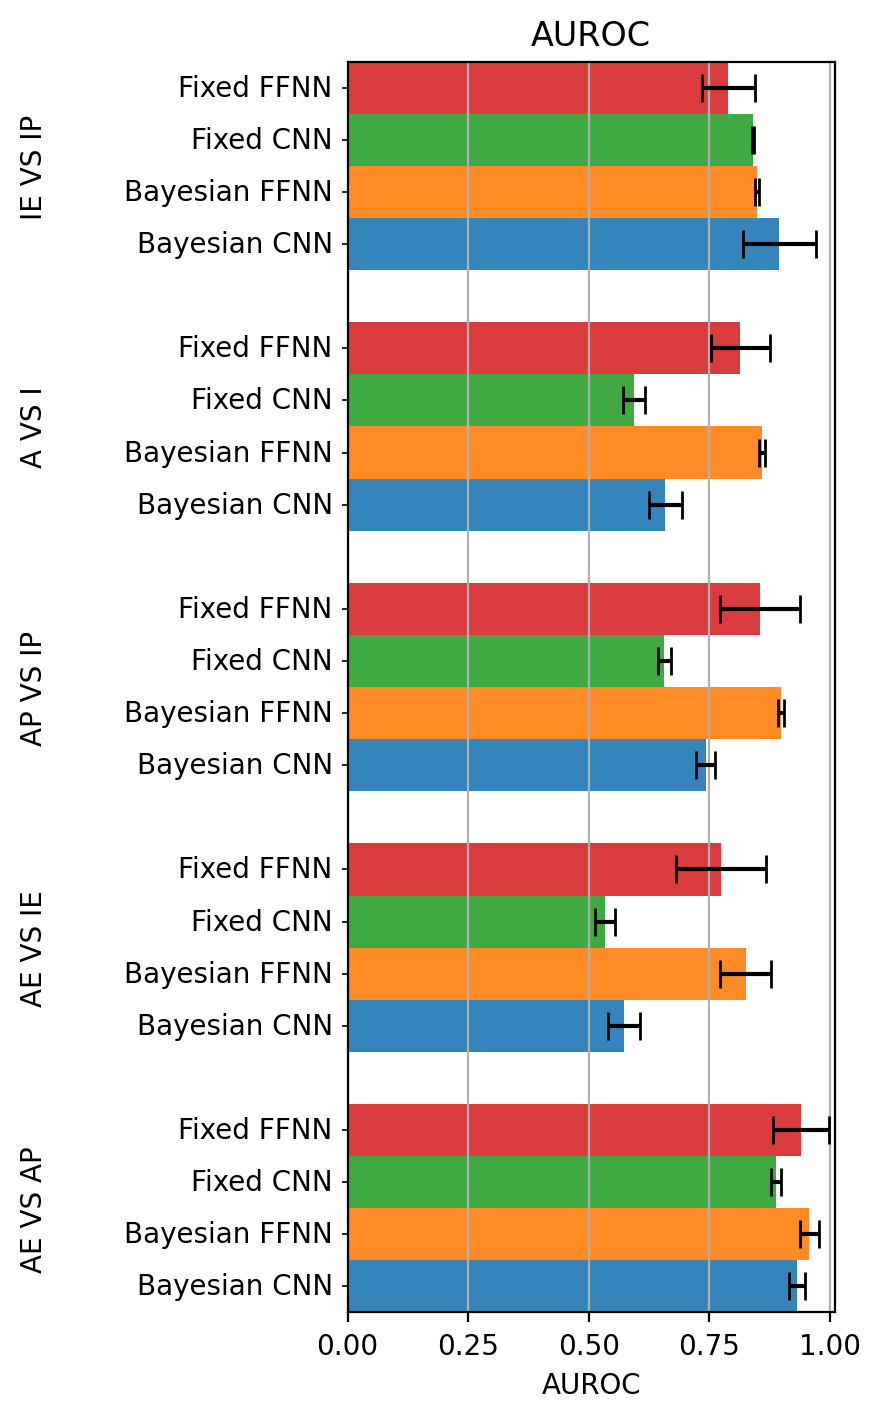

In [8]:
sub_csv = df[df.cell_line.isin(["GM12878", "HepG2", "K562"])]

index = ["task", "model"]
fig, axes = barplots(
    sub_csv.drop(columns=["holdout_number"])[index+["AUROC", "AUPRC"]],
    groupby=index,
    custom_defaults=custom_defaults,
    #path=f'barplots_{meta_model}/{{feature}}.png',
    show_legend=False,
    orientation="horizontal",
    unique_minor_labels=False,
    major_rotation=90
)